In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json('posts_clean.json')

In [42]:
df

,index,name,summary,description,website,industry,headquarters,size,type,founded,...,length_category,contains_link,tokens,emojis,emoji_count,flesch_reading_ease,sentiment,sentiment_category,readability,readability_level
0,0,Grainger,For The Ones Who Get It Done,As a leading business-to-business organization...,https://www.linkedin.com/redir/redirect?url=ht...,Retail Office Equipment,"Lake Forest, Illinois","10,001+ employees",Public Company,1927.0,...,short,0,"[grainger, one]",[],0,117.67,0.000000,neutral,117.67,high
33716,33716,SEPHORA,"Reimagine your future, with Sephora","At Sephora, we stand together and we stand for...",https://www.linkedin.com/redir/redirect?url=ht...,Retail,"Neuilly sur Seine, Ile de France","10,001+ employees",Privately Held,1969.0,...,short,0,"[sephora, believe, beauty, empowers, extraordi...",[],0,57.77,0.333333,positive,57.77,medium
45440,45440,Boston Scientific,None,"At Boston Scientific, we work collaboratively ...",https://www.linkedin.com/redir/redirect?url=ht...,Medical Equipment Manufacturing,"Marlborough, MA","10,001+ employees",Public Company,NaN,...,short,0,[week],[],0,120.21,0.000000,neutral,120.21,high
45439,45439,The Coca-Cola Company,None,The Coca-Cola Company (NYSE: KO) is a total be...,https://www.linkedin.com/redir/redirect?url=ht...,Food and Beverage Services,"Atlanta, GA","10,001+ employees",Public Company,NaN,...,medium,0,"[water, priority, company, essential, life, be...",[],0,54.22,0.177778,positive,54.22,medium
45438,45438,Brookfield Asset Management,None,Brookfield Asset Management is a leading globa...,https://www.linkedin.com/redir/redirect?url=ht...,Financial Services,"Toronto, New York","1,001-5,000 employees",Public Company,NaN,...,medium,0,"[pleased, announce, agreement, acquire, triton...",[],0,49.82,0.291667,positive,49.82,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21804,21804,National Cybersecurity Center,Leadership | Collaboration | Education,The National Cybersecurity Center (NCC) is a 5...,https://www.linkedin.com/redir/redirect?url=ht...,Computer and Network Security,"Colorado Springs, Colorado",51-200 employees,Nonprofit,NaN,...,short,0,[],[],0,121.22,0.000000,neutral,121.22,high
21805,21805,Caption Health,Detecting disease earlier with AI and ultrasound.,Our mission is to detect disease early – when ...,https://www.linkedin.com/redir/redirect?url=ht...,Hospitals and Health Care,"San Mateo, California",11-50 employees,Privately Held,2013.0,...,short,0,"[today, joined]",[],0,100.24,0.000000,neutral,100.24,high
21806,21806,AJR Trucking,USPS Contract Carrier,AJR Trucking has developed a very different st...,https://www.linkedin.com/redir/redirect?url=ht...,Truck Transportation,"Compton, California",201-500 employees,Privately Held,NaN,...,long,0,"[trucking, attended, american, trucking, assoc...","[🤲, 🔹, 🔹, 🔹, 🔹, 🔹, 🔹, 🔹, 🔹, 🔹, 🔹, 🔹, 🔹, 🤝]",14,-21.24,0.152315,positive,-21.24,low
21807,21807,"Javen Technologies, Inc.",None,Javen Technologies is a Bloomington based Soft...,https://www.linkedin.com/redir/redirect?url=ht...,IT Services and IT Consulting,"Bloomington, MN",201-500 employees,Privately Held,2003.0,...,long,0,"[one, direct, clients, looking, google, cloud,...",[],0,64.81,0.047500,positive,64.81,high


In [12]:
df['likes'] = pd.to_numeric(df['likes'], errors='coerce')
df = df.dropna(subset=['likes'])
df['likes'] = df['likes'].astype(int)

/var/folders/s3/51rzg94s5318dvd1cr9t6cq40000gn/T/ipykernel_4641/2807642275.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['likes'] = df['likes'].astype(int)


In [13]:
df.groupby('content_type')['likes'].mean()

content_type
link     42.172931
text     40.467470
video    69.230598
Name: likes, dtype: float64

In [19]:
df['text_length'] = df['text'].str.len()
df['length_category'] = pd.cut(df['text_length'], bins=[0, 200, 400, float('inf')], labels=['short', 'medium', 'long'])
df.groupby('length_category')['likes'].mean()

/var/folders/s3/51rzg94s5318dvd1cr9t6cq40000gn/T/ipykernel_4641/2139963505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_length'] = df['text'].str.len()
/var/folders/s3/51rzg94s5318dvd1cr9t6cq40000gn/T/ipykernel_4641/2139963505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length_category'] = pd.cut(df['text_length'], bins=[0, 200, 400, float('inf')], labels=['short', 'medium', 'long'])


length_category
short     42.092474
medium    44.351944
long      50.068407
Name: likes, dtype: float64

In [24]:
import re
df['contains_link'] = df['text'].apply(lambda x: 1 if re.search(r'http\S+', x) else 0)
df.groupby('contains_link')['likes'].mean()

/var/folders/s3/51rzg94s5318dvd1cr9t6cq40000gn/T/ipykernel_4641/1122004876.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['contains_link'] = df['text'].apply(lambda x: 1 if re.search(r'http\S+', x) else 0)


contains_link
0    44.025062
1    35.164416
Name: likes, dtype: float64

In [41]:
import textstat

def readability_level(score):
    if score >= 60:
        return "high"
    elif score >= 30:
        return "medium"
    else:
        return "low"

# Assuming your data frame is called df
df['readability'] = df['text'].apply(textstat.flesch_reading_ease)
df['readability_level'] = df['readability'].apply(readability_level)

df.groupby('readability_level')['likes'].mean()

/var/folders/s3/51rzg94s5318dvd1cr9t6cq40000gn/T/ipykernel_4641/83393393.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['readability'] = df['text'].apply(textstat.flesch_reading_ease)
/var/folders/s3/51rzg94s5318dvd1cr9t6cq40000gn/T/ipykernel_4641/83393393.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['readability_level'] = df['readability'].apply(readability_level)


readability_level
high      40.917918
low       45.721382
medium    48.140539
Name: likes, dtype: float64

In [39]:
from textblob import TextBlob

def sentiment_category(sentiment_score):
    if sentiment_score > 0:
        return "positive"
    elif sentiment_score < 0:
        return "negative"
    else:
        return "neutral"

df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment_category'] = df['sentiment'].apply(sentiment_category)

df.groupby('sentiment_category')['likes'].mean()

/var/folders/s3/51rzg94s5318dvd1cr9t6cq40000gn/T/ipykernel_4641/2257306382.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
/var/folders/s3/51rzg94s5318dvd1cr9t6cq40000gn/T/ipykernel_4641/2257306382.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_category'] = df['sentiment'].apply(sentiment_category)


sentiment_category
negative    40.922125
neutral     41.550640
positive    45.000905
Name: likes, dtype: float64

In [51]:
# Find the number of hashtags in each post
df['num_hashtags'] = df['text'].apply(lambda x: len(re.findall(r'#\w+', x)))

# Find the number of mentions in each post
df['num_mentions'] = df['text'].apply(lambda x: len(re.findall(r'@\w+', x)))

/var/folders/s3/51rzg94s5318dvd1cr9t6cq40000gn/T/ipykernel_4641/2549476386.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_hashtags'] = df['text'].apply(lambda x: len(re.findall(r'#\w+', x)))
/var/folders/s3/51rzg94s5318dvd1cr9t6cq40000gn/T/ipykernel_4641/2549476386.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_mentions'] = df['text'].apply(lambda x: len(re.findall(r'@\w+', x)))


In [54]:
df.groupby('num_hashtags')['likes'].mean()

num_hashtags
0     43.838367
1     47.059925
2     53.892857
3     21.636364
4     49.200000
5     24.666667
6     11.000000
8     32.000000
9     37.500000
17     9.000000
Name: likes, dtype: float64

In [55]:
df.groupby('num_mentions')['likes'].mean()

num_mentions
0     43.914939
1     35.840970
2     38.518519
3     45.181818
4     25.222222
6     20.400000
9     14.000000
14     2.000000
Name: likes, dtype: float64

In [52]:
df['num_hashtags'].mean()

0.010434197239986537

In [53]:
df['num_mentions'].mean()

0.008795164854462705

In [44]:
# Find average like count
df['likes'].mean()

43.861809081995524

In [45]:
# Find average text length
df['text_length'].mean()

224.2519426924034

In [46]:
# Average amount of emojis
df['emoji_count'].mean()

0.3243674359387119

In [47]:
# Calculate average engagement rate (likes / followers)
df['engagement_rate'] = df['likes'] / df['followers']

# Average engagement rate
df['engagement_rate'].mean()

/var/folders/s3/51rzg94s5318dvd1cr9t6cq40000gn/T/ipykernel_4641/2159575574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['engagement_rate'] = df['likes'] / df['followers']


0.00522106538133319

In [48]:
# Average sentiment
df['sentiment'].mean()

0.2301968735025428

In [57]:
# Companies that are founded after 2021
explo_df = df[df['founded'] > 2021]


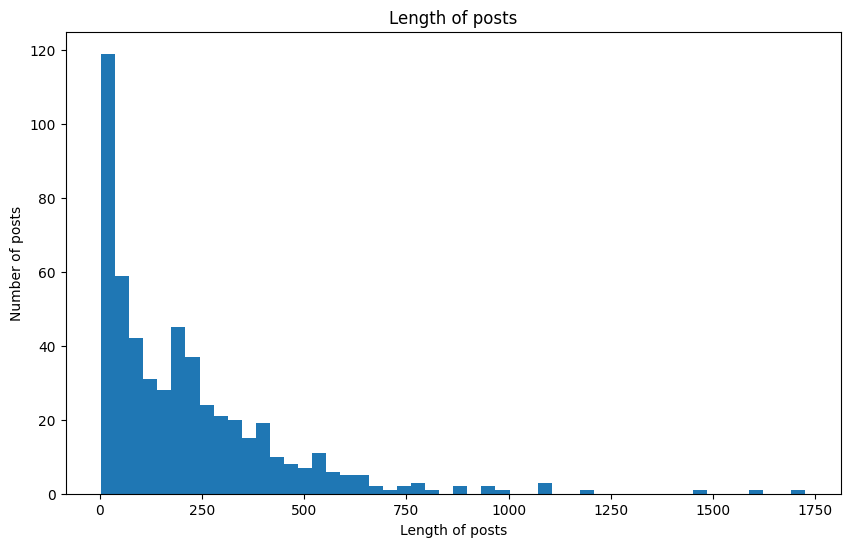

In [59]:
# bar chart of the length of the posts
plt.figure(figsize=(10, 6))
plt.hist(explo_df['text_length'], bins=50)
plt.xlabel('Length of posts')
plt.ylabel('Number of posts')
plt.title('Length of posts')
plt.show()